# Spectral Methods

## Overview

These notes introduce some of the basic concepts of Fourier spectral methods, and are based largely on the books:

* C. Canuto, M. Y. Hussaini, A. Quarteroni and T. A. Zhang, *Spectral Methods: Fundamentals in Single Domains* (Springer-Verlag, 2006)
* L. N. Trefethen, *Spectral Methods in Matlab* (SIAM, Philadelphia, 2000)

---



## Introduction to Spectral Methods

To introduce spectral methods, consider the following boundary value problem:

$$
Lu = f(x),\qquad x \in(0,1)
$$

subject to the homogeneous Dirichlet boundary conditions $u(0) = u(1) = 0$, where $L$ is a differential operator.

To solve this problem using a spectral method, we start by representing the solution as the following sum:

$$
u(x) =\sum_{j=1}^{\infty} a_j \phi_j(x)
$$

with $\{\phi_j(x)\}$ denoting a set of basis functions. For spectral methods, we call these functions **trial functions**. If these basis functions are known *a priori* then our problem turns toward determining the set of expansion coefficients $\{a_j\}$.

We now introduce a **spectral approximation**, which is a truncation of the sum given above,

$$
u(x) \approx U_N(x) =\sum_{j=1}^{N} a_j \phi_j(x)
$$

and define the **residual function** as:

$$
R(x)=LU_N(x)-f(x).
$$

For instance, for the linear differential operator $L = \frac{\partial}{\partial x}\left(\gamma(x)\,\frac{\partial }{\partial x}\right)$, the residual function is:

$$
R(x) = \sum_{j=1}^N\left(\frac{\partial \gamma(x)}{\partial x}\frac{\partial\phi_j(x)}{\partial x} + \gamma(x)\frac{\partial^2 \phi_j(x)}{\partial x^2}\right)
$$

If the sum for the true solution $u(x)$ terminates after $j = N$, then $u = U_N$ and then $R = 0$ identically. However, this situation is not going to be true in general. In light of this, we can design different numerical approximations by considering different minimizations of this residual. The different approaches to minimizing this residual yield different spectral methods for solving this boundary value problem.

### Spectral Collocation Methods

Suppose we choose $N-2$ points in $(0,1)$ denoted by $x_1,\,x_2,\,\dots,\,x_{N-2}.$ These points need not be evenly spaced. Then one method for minimizing $R(x)$ is to impose that $R(x_i) = 0$ identically for $i = 1, 2, \dots , N-2$ as well as imposing that:

$$
U_N(0) = \sum_{j=1}^N a_j\phi_j(0)=u(0)
$$

and

$$
U_N(1) = \sum_{j=1}^N a_j\phi_j(1)=u(1).
$$

In doing so, we obtain $N$ algebraic equations for the $N$ unknowns $a_1, a_2, \dots , a_N$ of the form $K \boldsymbol{a} = \boldsymbol{f}$.

### Spectral Galerkin Methods

For simplicity, let us assume that the basis functions satisfy the boundary conditions, namely:

$$
\phi_j(0) = \phi_j (1) = 0,\quad j = 1, 2, \dots , N.
$$

Now, let us introduce a set of test functions $\{\psi_i(x)\}_{i=1}^N$. Another method to reduce the residual is to require that:

$$
\int_0^1 R(x)\psi_i(x)dx = 0,\quad i = 1, 2, \dots , N.
$$

Substituting our expression for $R(x)$, we obtain a system of linear equations to solve for the coefficients $a_j$.

---



## Fourier methods for approximation

### Fourier spectral approximations

Fourier spectral methods are useful for problems with periodic boundary conditions. Consider the function $u(x)\in L^2([0, 2\pi])$. Moreover, let us assume that this function is periodic so that $u(x \pm 2\pi) = u(x)$. A natural representation for this function is the Fourier series:

$$
u(x) =\sum_{k=-\infty}^N a_k e^{ikx}.
$$

We now introduce the truncated Fourier series:

$$
u(x) \approx U_N(x) \equiv P_N u(x) = \sum_{k=-N/2}^{N/2-1} a_k e^{ikx}.
$$

$P_N$ is the **spectral $L_2$ projection** (observe that $P_N^2 = P_N$).

We are concerned with understanding how $|u - P_N u |\to 0$ as $N \to \infty$. By definition, we have:

$$
a_k = \int_0^{2\pi} u(x) e^{ikx} dx.
$$

> **Theorem 1.** If $u$ is $m$-times continuously differentiable in $[0, 2\pi]$ and if $u^{(j)}(x)$ is periodic for all $j \leq m - 2$ then
> $$a_k = O(k^{-m}),\quad k = \pm1, \pm2, \dots.$$

As a corollary to this statement, we find that the $k$-th Fourier coefficient of a function which is infinitely differentiable and periodic with all its derivatives on $[0, 2\pi]$ decays faster than any negative power of $k$. The spectral approximation has order of accuracy $1/N^m$ for any $m$!

### The Discrete Fourier Expansion

The theory we discussed above was for the case in which $x$ is a continuous variable in $[0,2\pi]$. For the discrete case:

$$
x_j = 2\pi j/N,\quad j = 0, 1, \dots , N - 1,
$$

we define the **$N/2$ degree trigonometric interpolant** of $u$ at the nodes $x_j$ as:

$$
I_N u(x) = \sum _{k=-N/2}^{N/2-1} \tilde{a}_k e^{ikx}.
$$

The coefficients $\tilde{a}_k$ are obtained enforcing the interpolating conditions $I_N(x_j)=u(x_j)$ and inverting the transformation through the **discrete Fourier transformation**:

$$
\tilde{a}_k=\frac{1}{N}\sum_{j=0}^{N-1}u(x_j)e^{-ikx_j},\qquad k=-N/2,\dots,N/2-1.
$$

> **Example 1: Aliasing**
>
> Consider approximating $u(x) = e^{i(N+r)x}$ for $0 < r < N$. On the collocation points $x_j$, we have:
> $$u(x_j) = e^{i(N+r)2 \pi j/N} = e^{i2\pi j} e^{ir2\pi j/N} = e^{irx_j}.$$
>
> 
>
> Hence, the mode $e^{i(N +r)x}$ cannot be resolved on the grid and is instead seen as the low frequency $e^{irx}$.


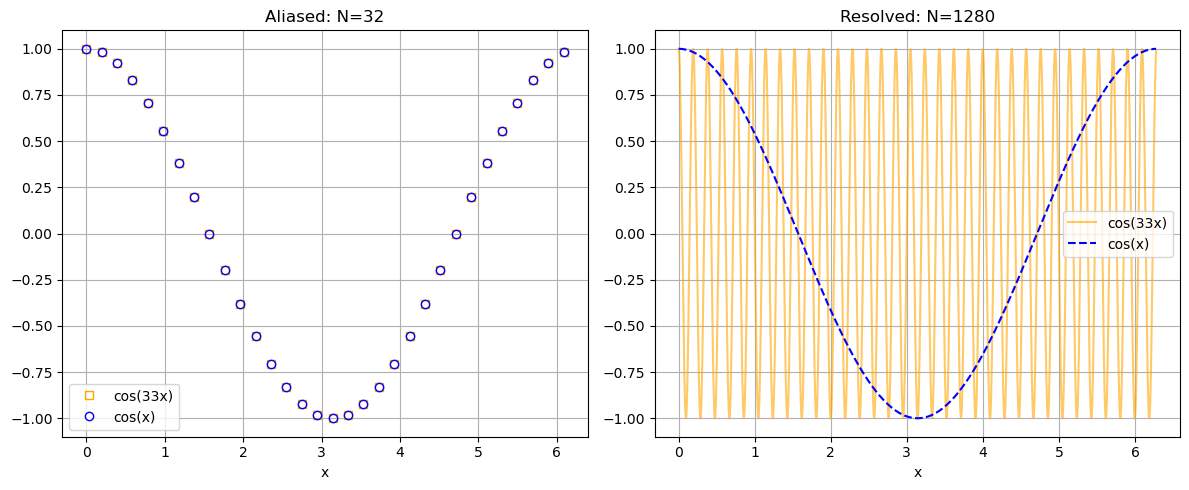

In [31]:
import numpy as np
import matplotlib.pyplot as plt

u = lambda x, k: np.cos(k * x)

# Part 1: Low Resolution (Aliasing Occurs)
N = 32
h = 2 * np.pi / N
x = h * np.arange(N) 
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, u(x, N + 1), 's', label='cos(33x)', markerfacecolor='none', markeredgecolor='orange')
plt.plot(x, u(x, 1), 'o', label='cos(x)', markerfacecolor='none', markeredgecolor='blue')

plt.title(f'Aliased: N={N}')
plt.xlabel('x')
plt.legend()
plt.grid(True)

# PART 2: High Resolution (Distinguishable)
N_high = 1280
h_high = 2 * np.pi / N_high
x_high = h_high * np.arange(N_high)
plt.subplot(1, 2, 2)
plt.plot(x_high, u(x_high, 33), '-', color='orange', alpha=0.6, label='cos(33x)')
plt.plot(x_high, u(x_high, 1), '--', color='blue', label='cos(x)')

plt.title(f'Resolved: N={N_high}')
plt.xlabel('x')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

If the Fourier series converges to $u$ at every node so that
$$u(x_j) = \sum _{k=-\infty}^{\infty} a_k e^{ikx_j}.,\qquad j=0,1,\dots,N-1,$$
then we find that
$$
\tilde{a}_k = a_k + \sum _{\substack{m=-\infty\\ m\neq0}}^{\infty} a_{k+Nm},\qquad k=-N/2,\dots,N/2-1.
$$
In other words, we have found that the $k$-th mode of the trigonometric interpolant $I_N u(x)$ depends not
only on the $k$-th mode of $u(x)$, but also on all modes of $u$ that alias the $k$-th mode on the
discrete grid. As in the example above, the $(k + N m)$-th wavenumber alias the $k$-th wavenumber on the grid (they are indistinguishable since $\phi_{k+N m} (x_j) = \phi_k (x_j)$).

Equivalently, we have $$I_N u = P_N u + R_N u,$$
with
$$R_N u(x) = \sum_{k=-N/2}^{N/2-1}\left( \sum _{\substack{m=-\infty\\ m\neq0}}^{\infty} a_{k+Nm} \right) e^{ikx}.$$
We call the error $R_N u$ made between the interpolating polynomial $I_N u$ and the truncated
Fourier series $P_N u$, the *aliasing error*. It is orthogonal to the truncation error $u - P_N u$ and so,
$$||u - I_N u||_2 = ||u - P_N u||_2 + ||R_N u||_2.$$
Thus, the error made by the interpolation is always bigger than the error made by the truncation
of the Fourier series.

Due to aliasing, one needs to be careful about using discrete Fourier series. The good news is
that for the discrete Fourier coefficients $\tilde{a}_k$, if $u$ is $m$-times continuously differentiable in $[0, 2\pi]$ and if $u^{(j)}$ is periodic for all $j \leq m - 2$, then $\tilde{a}_k$ has the same asymptotic properties as $a_k$. Thus, the spectral convergence properties hold also for $I_N u$.


### Spectral differentiation

Formally, if
$$u(x) = \sum _{k=-\infty}^{\infty} a_k e^{ikx},$$
then
$$u'(x) = \sum _{k=-\infty}^{\infty} ika_k e^{ikx},$$
provided that this second series converges. Consequently, truncation and differentiation commute so that
$$(P_N u)' = P_N u'.$$
For the discrete Fourier expansion, we introduce $(D_N u)_j \approx u'(x_j)$ defined as
$$
(D_N u)_j = \sum _{k=-N/2}^{N/2-1} \tilde{a}^{(1)}_k e^{i2\pi kj/N},\qquad j=0,1,\dots,N-1,
$$
with
$$
\tilde{a}^{(1)}_k=ik\tilde{a}_k=\frac{ik}{N}\sum_{j=0}^{N-1}u(x_j)e^{-i2\pi kj/N},\quad k=-N/2,\dots,N/2-1.
$$
In other words, we approximate the derivative $u$ by taking the exact derivative of $I_N u$, i.e.
$$D_N u = (I_N u)'.$$
We call $D_N u$ the \textit{Fourier interpolation derivative of $u$} in contrast to $P_N u'$ which we call the \textit{Fourier
projection derivative}. In general, $D_N u \neq P_N u'$. Moreover, interpolation and differentiation do not commute so $(I_N u)' \neq I_N u'$ unless $u = I_N u$. However, it can be shown that the error $(I_N u)' - I_N u'$ is of the same order as the truncation error for the derivative $u' - P_N u'$ from which it follows that interpolation differentiation is spectrally accurate.



#### Numerical implementation

**Using FFT:**

What we have discussed is tantamount in the following numerical implementation:
- FFT $u(x_j)$ for $j = 0, 1, \dots, N-1$ to obtain $\tilde{a}_k$ for $k = -N/2, \dots , N/2 - 1$.
- Compute $\tilde{a}^{(1)}_k = ik\tilde{a}_k$ for $k = -N/2, \dots, N/2-1$.
- Inverse FFT $\tilde{a}_k$ for $k = -N/2, \dots , N/2 - 1$ to obtain $(D_N u)_j$ for $j = 0, 1, \dots , N - 1$.

**Differentiation matrix:**

We can represent Fourier interpolation differentiation as a matrix-vector product of the form
$$
(D_N u)_j = \sum_{l=1}^{N}  (D_N)_{jl} u_l,
$$
with 
$$
(D_N)_{jl} = \frac{1}{N} \sum_{k=-N/2}^{N/2-1} ike^{i2\pi k(j-l)/N}.
$$
We call the matrx $D_N$ the \textit{Fourier interpolation derivative matrix}. When $u$ is a real function,
the $k = -N/2$ terms makes a purely imaginary contribution which effectively dissapears. Thus, in practice
$$
(D_N)_{jl} = \frac{1}{N} \sum_{k=-N/2+1}^{N/2-1} ike^{i2\pi k(j-l)/N}.
$$
One can evaluate this sum in closed form which is given by
$$
D_N)_{jl} =
\left\lbrace
\begin{array}{ll}
\frac{1}{2}(-1)^{j+l} \cot[(j - l)\pi/N ]& j \neq l\\
0 & j = l
\end{array}
\right.
$$


This matrix is skew-symmetric so that $D_N^T = -D$. Its eigenvalues are $ik$ for $k = -N/2 + 1, \dots , N/2 - 1$. The eigenvalue $0$ has multiplicity $2$. The corresponding eigenvectors are grid values of the functions 1 and $\cos(N x/2)$.



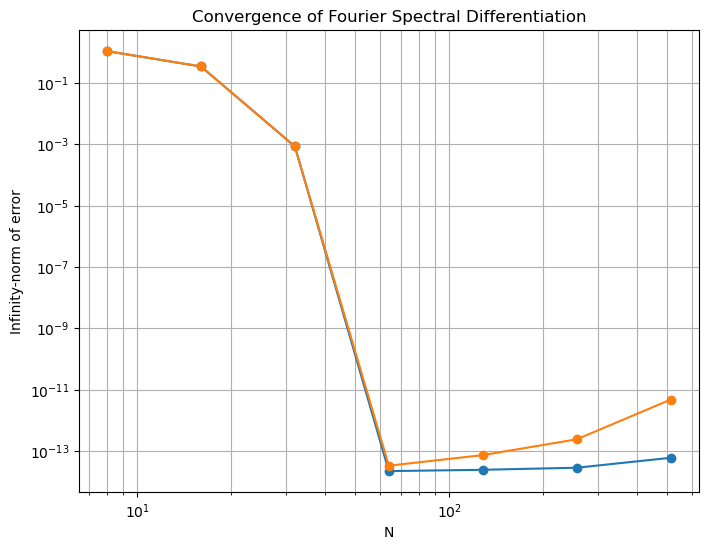

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz


# Set the number of Fourier modes
N_list = np.array([8, 16, 32, 64, 128, 256, 512])
Num = len(N_list)

max_error = np.zeros(Num) # Allocate memory for the error vectors
max_error2 = np.zeros(Num) # Allocate memory for the error vectors

# Loop over each Fourier mode
for j in range(Num):
    N = N_list[j]

    # Compute the spatial grid
    Lx = 2 * np.pi
    h = Lx / N
    x = np.arange(0, 2 * np.pi, h)

    k = (2 * np.pi / Lx) * np.fft.fftshift(np.arange(-N/2, N/2))
    U = np.exp(-8 * (x - np.pi)**2)
    dU = np.real(np.fft.ifft(1j * k * np.fft.fft(U)))
    dUexact = -16 * (x - np.pi) * U
    max_error[j] = np.linalg.norm(dUexact - dU, np.inf)


    # column vector for Toeplitz
    indices = np.arange(1, N)
    col_vals = 0.5 * ((-1.0)**indices) * (1.0 / np.tan(indices * h / 2.0))
    column = np.concatenate(([0], col_vals))
    row = np.concatenate(([column[0]], column[N-1:0:-1]))
    D = toeplitz(column, row)
    dU2 = D @ U
    max_error2[j] = np.linalg.norm(dUexact - dU2, np.inf)

# Plot the results
plt.figure(figsize=(8, 6))
plt.loglog(N_list, max_error, 'o-')
plt.loglog(N_list, max_error2, 'o-')
plt.xlabel('N')
plt.ylabel('Infinity-norm of error')
plt.title('Convergence of Fourier Spectral Differentiation')
plt.grid(True, which="both", ls="-")
plt.show()

## Fourier methods for PDEs

Consider a PDE of the form $u_t = Lu, \qquad u(x,0) = u_0(x)$. Here $L$ is a spatial differential operator. If we assume periodicity so that $u(0,t) = u(2\pi,t)$ then we can consider two methods:

1.  **Pseudo-spectral** (solve the PDE in *physical space*)
2.  **Fourier Galerkin** (solve the PDE in *transform space*)

### Pseudo-Spectral Method

Let us introduce the collocation points $x_j = 2\pi j/N$ for $j = 0, 1, \dots , N - 1$ and let $U_j(t)$ denote the numerical approximation of $u(x_j,t)$. Then, we solve the approximate equations:

$$
\frac{dU_j}{dt} = L(\tilde{U}_N)_j,\quad j = 0, 1, \dots , N - 1.
$$

Here, $\tilde{U}_N$ is the trigonometric polynomial which interpolates $U_j$. In other words:

1.  Form the spectral interpolant $\tilde{U}_N$.
2.  Apply the operator $L$ to $\tilde{U}_N$.
3.  Evaluate $L(\tilde{U}_N)$ at the collocation points to obtain $L(\tilde{U}_N)_j$.
4.  Solve in time using MOL (Method of Lines).

The following examples illustrate the procedure to follow:

  * For the constant coefficient advection equation $u_t = u_x$ subject to $u(x,0) = u_0(x)$, we set $\tilde{U}_j(0) = u_0(x_j)$, for $j = 0, 1, 2, \dots, N-1$, and compute the pseudo-spectral approximation:

    $$
    \tilde{a}_k=\frac{1}{N}\sum_{j=0}^{N-1}\tilde{U}_je^{-ikx_j},\quad k=-N/2,\dots,N/2-1,
    $$

    and

    $$
    \left.\partial_x\tilde{U}_N\right|_{x=x_j}=\sum_{k=-N/2}^{N/2-1}(ik)\tilde{a}_ke^{ikx_j}.
    $$

    Then, we evolve $\left.\tilde{U}_N\right|_{x=x_j}$ by the equation:

    $$
    \frac{d}{dt}\left.\tilde{U}_N\right|_{x=x_j}=\left.\partial_x\tilde{U}_N\right|_{x=x_j}.
    $$

  * For the variable coefficient advection equation $u_t = c(x)u_x$ subject to $u(x,0) = u_0(x)$, we perform the same steps as above, but instead we evolve $\left.\tilde{U}_N\right|_{x=x_j}$ by the equation:

    $$
    \frac{d}{dt}\left.\tilde{U}_N\right|_{x=x_j}=c(x_j)\left.\partial_x\tilde{U}_N\right|_{x=x_j}.
    $$

  * For the diffusion equation $u_t = u_{xx}$ subject to $u(x,0) = u_0 (x)$, we use the pseudo-spectral:

    $$
    \left.\partial_{xx}\tilde{U}_N\right|_{x=x_j}=\sum_{k=-N/2}^{N/2-1}(ik)^2\tilde{a}_ke^{ikx_j}.
    $$

    Then, we evolve $\left.\tilde{U}_N\right|_{x=x_j}$ by the equation:

    $$
    \frac{d}{dt}\left.\tilde{U}_N\right|_{x=x_j}=\left.\partial_{xx}\tilde{U}_N\right|_{x=x_j}.
    $$

  * For Burger's equation $u_t = -uu_x + \eta u_{xx}$ subject to $u(x,0) = u_0(x)$, we evolve $\left.\tilde{U}_N\right|_{x=x_j}$ by the equation:

    $$
    \frac{d}{dt}\left.\tilde{U}_N\right|_{x=x_j}= - \left(\left.\tilde{U}_N\right|_{x=x_j}\right) \left(\left.\partial_x\tilde{U}_N\right|_{x=x_j}\right) + \eta \left.\partial_{xx}\tilde{U}_N\right|_{x=x_j}.
    $$


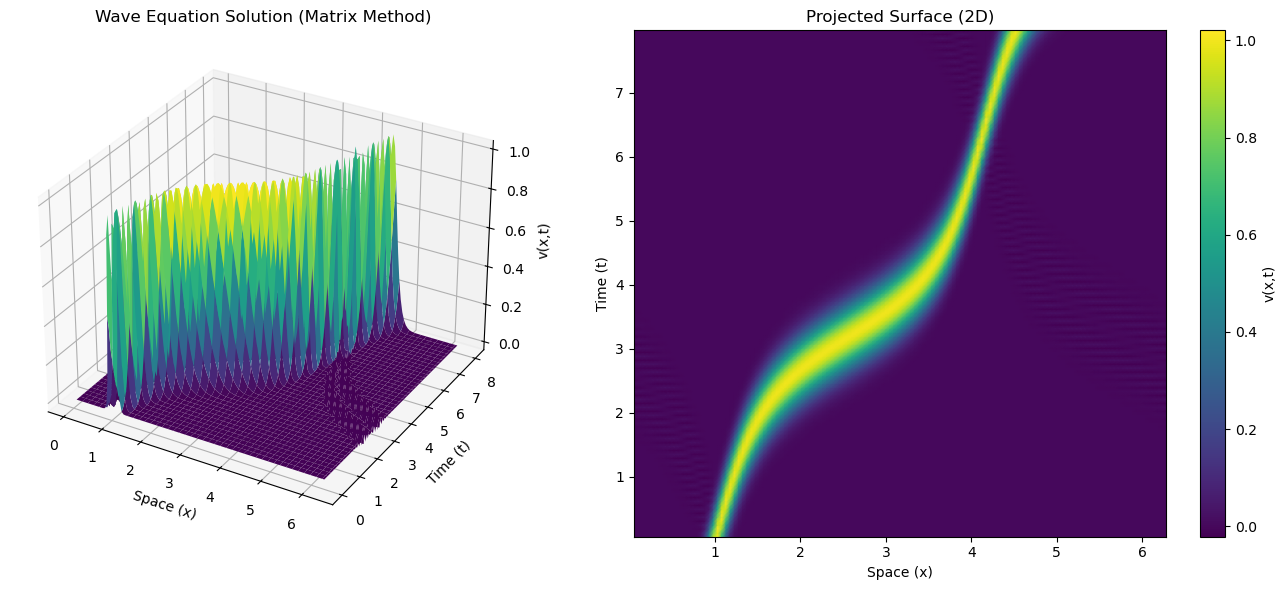

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def solve_wave_eq_fft():

    # Grid, variable coefficient, and initial data
    N = 128
    h = 2 * np.pi / N
    x = h * np.arange(1, N + 1)
    dt = h / 4

    # Variable coefficient c(x)
    c = 0.2 + np.sin(x - 1)**2

    # Initial condition
    v = np.exp(-100 * (x - 1)**2)

    # Previous time step (vold) approximation assuming left-wave propagation
    vold = np.exp(-100 * (x - 0.2 * dt - 1)**2)

    # Time-stepping by leap frog formula
    t = 0
    tmax = 8
    niter = int(tmax / dt)

    data = []
    tn = []

    # Pre-compute wavenumbers for spectral derivative
    # fftshift orders frequencies as [0, 1, ... N/2-1, -N/2, ... -1]
    # which matches the output of fft(v)
    k_vec = np.fft.fftshift(np.arange(-N/2, N/2))

    for n in range(niter):
        t = t + dt

        # Derivative approximation using FFT
        v_hat = np.fft.fft(v)
        w_hat = 1j * k_vec * v_hat
        w = np.real(np.fft.ifft(w_hat))

        # Leap-frog update
        vnew = vold - 2 * dt * c * w

        # Update variables
        vold = v.copy()
        v = vnew.copy()

        # Store data every 5 steps
        if (n + 1) % 5 == 0:
            data.append(vnew.copy())
            tn.append(t)

    # Convert lists to arrays for plotting
    data = np.array(data)
    tn = np.array(tn)

    # Plotting
    X, T = np.meshgrid(x, tn)

    fig = plt.figure(figsize=(14, 6))

    # --- Left: 3D surface ---
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    surf = ax1.plot_surface(X, T, data, cmap='viridis', edgecolor='none')
    ax1.set_xlabel('Space (x)')
    ax1.set_ylabel('Time (t)')
    ax1.set_zlabel('v(x,t)')
    ax1.set_title('Wave Equation Solution (Matrix Method)')

    # --- Right: 2D projection ---
    ax2 = fig.add_subplot(1, 2, 2)
    pcm = ax2.pcolormesh(X, T, data, shading='gouraud', cmap='viridis')
    ax2.set_xlabel('Space (x)')
    ax2.set_ylabel('Time (t)')
    ax2.set_title('Projected Surface (2D)')

    fig.colorbar(pcm, ax=ax2, label='v(x,t)')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    solve_wave_eq_fft()

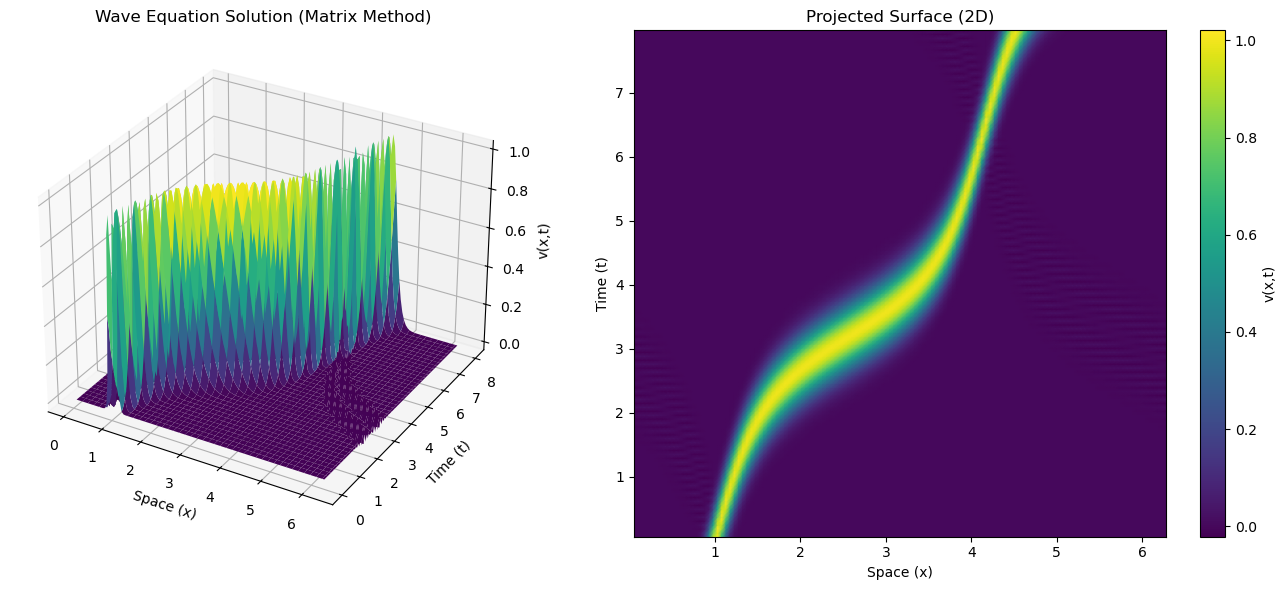

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
from mpl_toolkits.mplot3d import Axes3D


def solve_wave_eq_matrix():
    # Grid, variable coefficient, and initial data
    N = 128
    h = 2 * np.pi / N
    x = h * np.arange(1, N + 1)
    dt = h / 4

    c = 0.2 + np.sin(x - 1)**2
    v = np.exp(-100 * (x - 1)**2)
    vold = np.exp(-100 * (x - 0.2 * dt - 1)**2)

    # Construct Differentiation Matrix D
    # column vector for Toeplitz
    indices = np.arange(1, N)
    col_vals = 0.5 * ((-1.0)**indices) * (1.0 / np.tan(indices * h / 2.0))
    column = np.concatenate(([0], col_vals))

    # Create Toeplitz matrix
    # Python's toeplitz(c, r) takes column and row
    # The row is [col[0], col[N-1], col[N-2] ... col[1]]
    row = np.concatenate(([column[0]], column[N-1:0:-1]))
    D = toeplitz(column, row)

    # Time-stepping by leap frog formula
    t = 0
    tmax = 8
    niter = int(tmax / dt)

    data = []
    tn = []

    for n in range(niter):
        t = t + dt

        # Derivative approximation using Matrix-Vector multiplication
        w = D @ v

        # Leap-frog update
        vnew = vold - 2 * dt * c * w

        # Update variables
        vold = v.copy()
        v = vnew.copy()

        if (n + 1) % 5 == 0:
            data.append(vnew.copy())
            tn.append(t)

    data = np.array(data)
    tn = np.array(tn)

    # Plotting
    X, T = np.meshgrid(x, tn)

    fig = plt.figure(figsize=(14, 6))

    # --- Left: 3D surface ---
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    surf = ax1.plot_surface(X, T, data, cmap='viridis', edgecolor='none')
    ax1.set_xlabel('Space (x)')
    ax1.set_ylabel('Time (t)')
    ax1.set_zlabel('v(x,t)')
    ax1.set_title('Wave Equation Solution (Matrix Method)')

    # --- Right: 2D projection ---
    ax2 = fig.add_subplot(1, 2, 2)
    pcm = ax2.pcolormesh(X, T, data, shading='gouraud', cmap='viridis')
    ax2.set_xlabel('Space (x)')
    ax2.set_ylabel('Time (t)')
    ax2.set_title('Projected Surface (2D)')

    fig.colorbar(pcm, ax=ax2, label='v(x,t)')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    solve_wave_eq_matrix()


### Galerkin Method

Instead of working with approximate function values, in this formulation we work with the Fourier coefficients. For the PDE $u_t = Lu,,\quad u(x,0) = u_0(x)$, we seek the solution in the form:

$$
u(x, t) \approx P_N u(x) = U_N (x, t) = \sum _{k=-N/2}^{N/2-1} a_k(t) e^{ikx}.
$$

By evaluating the expression above at $t = 0$, we find that:

$$
U_N (x,0) = \sum _{k=-N/2}^{N/2-1} a_k(0) e^{ikx}\approx u(x,0)=u_0(x).
$$

Since we know $u_0(x)$, we can compute the coefficients $a_k(0)$ as accurately as we would like. Then we obtain equations for $a_k(t)$ by substituting the solution form into the PDE and computing the $k$-th mode of the right-hand side.

  * For the constant coefficient advection equation, $u_t = u_x$ we obtain:

    $$
    \frac{da_k}{dt} = ika_k,\qquad k = -N/2, \dots , N/2 - 1.
    $$

  * For the diffusion equation, $u_t = u_{xx}$, we obtain:

    $$
    \frac{da_k}{dt} = -k^2a_k,\qquad k = -N/2, \dots , N/2 - 1.
    $$

  * However, observe that things become complicated when there are variable coefficients or nonlinear terms. For the variable coefficient advection equation $u_t = c(x)u_x$, suppose $c(x) =\sum_{j=-\infty}^{\infty} c_j e^{ijx}$. Then, substituting this representation and $u(x, t) \approx \sum _{k=-N/2}^{N/2-1} a_k(t) e^{ikx}$ into the PDE, we obtain:

    $$
    \partial_t\left(\sum _{k=-N/2}^{N/2-1} a_k(t) e^{ikx}\right) = \left(\sum_{j=-\infty}^{\infty} c_j e^{ijx}\right)
    \left(\sum_{k=-N/2}^{N/2-1}(ik){a}_k(t)e^{ikx_j}\right).
    $$

    By multiplying the equation by $e^{-ilx}/(2\pi)$ and integrating with respect to $x$, we obtain:

    $$
    \frac{da_l}{dt} = i \sum_{r=-\infty}^{\infty} c_r(l-r)a_{l-r}.
    $$

    In fact, the sum is finite since $a_l = 0$ for $l <-N/2$ and $l \geq N/2$. We call this sum a convolution sum. This is the main problem in using Galerkin methods.

### Remarks:

  * Galerkin methods are more expensive than pseudo-spectral methods because products in physical space are evaluated as convolution sums.
  * Galerkin methods work in Fourier space instead of physical space which is advantageous for specific applications, e.g. turbulence.
  * For pseudo-spectral methods, products are no problem since products are evaluated in physical space.
  * In Galerkin methods, the high frequencies are projected to zero.
  * In pseudo-spectral methods, the high frequencies alias to lower frequencies.



#### Example: The KdV equation

It can be advantageous to solve problems in transform space rather than physical space. One reason is that one can integrate the evolution equations for the Fourier coefficients more efficiently. However, if the problem has products or nonlinearities, one must compute convolution sums. One alternative is to compute those products in physical space and transform those results. This is also a pseudo-spectral method.

Consider the Korteweg-de Vries equation:

$$
u_t = 6uu_x - u_{xxx}.
$$

Suppose we seek an approximation of the form:

$$
u(x, t) \approx \sum _{k=-N/2}^{N/2-1} \tilde{a}_k(t) e^{ikx}.
$$

Then, the coefficients $\tilde{a}_k(t)$ evolve by the equation:

$$
\frac{d\tilde{a}_k}{dt} = 6b_k + (ik)^3 \tilde{a}_k, \quad k = -N/2, \dots , N/2 - 1,
$$

with

$$
b_k(t) = \frac{1}{2\pi}\int_0^{2\pi} u(x,t)u_x(x,t)e^{-ikx} dx.
$$

We can obtain a pseudo-spectral approximation $\tilde{b}_k$ by the following procedure:

1.  Using the inverse FFT, evaluate $\left.\tilde{U}_N\right|_{x=x_j} \approx \sum _{k=-N/2}^{N/2-1} \tilde{a}_k(t) e^{ikx_j}$ and the collocation points $x_j = 2\pi j/N$ for $j = 0, 1, \dots , N-1$.
2.  Using the inverse FFT, evaluate $\left.\partial_x\tilde{U}_N\right|_{x=x_j}=\sum_{k=-N/2}^{N/2-1}(ik)\tilde{a}_k(t)e^{ikx_j}$ and the collocation points $x_j = 2\pi j/N$ for $j = 0, 1, \dots , N-1$.
3.  Compute the product $\tilde{V}_j = \left(\left.\tilde{U}_N\right|_{x=x_j}\right)\left(\left.\partial_x\tilde{U}_N\right|_{x=x_j}\right)$.
4.  Using the FFT, evaluate $\tilde{b}_k = \frac{1}{N}\sum_{j=0}^{N-1}\tilde{V}_j e^{-ikx_j}$ for $k=-N/2,\dots,N/2$.

Using this pseudo-spectral approximation, we then evolve $\tilde{a}_k$ by the equation:

$$
\frac{d\tilde{a}_k}{dt} = 6\tilde{b}_k + (ik)^3 \tilde{a}_k,\qquad k = -N/2, \dots , N/2 - 1.
$$

This equation can be rewritten as:

$$
\frac{d}{dt} \left[e^{-(ik)^3t}\tilde{a}_k(t)\right] = 6e^{-(ik)^3t} \tilde{b}_k (t).
$$

Very often, integrating this system numerically is better from a stability point-of-view. Consider the forward Euler scheme applied to this equation:

$$
e^{-(ik)^3t_{n+1}}\tilde{a}_k(t_{n+1})=e^{-(ik)^3t_{n}}\tilde{a}_k(t_n) + \Delta t 6e^{-(ik)^3t_n}\tilde{b}_k(t_n).
$$

This equation simplifies to:

$$
\tilde{a}_k(t_{n+1}) = e^{(ik)^3\Delta t} \left[\tilde{a}_k (t_n) + \Delta t6\tilde{b}_k (t_n).\right]
$$

From this, we see that any stability restrictions arise only from the term proportional to $\tilde{b}_k$ corresponding to the nonlinear terms.

-----


## Time stepping methods for Fourier spectral approximations

For the pseudo-spectral method, we obtained evolution equations of the form:

$$
\left.\frac{d\tilde{U}_N}{dt}\right|_{x=x_j} = \left.I_N L(\tilde{U}_N)\right|_{x=x_j},\qquad \tilde{U}_N(x_j,0) = I_N u_0(x_j) = u_0(x_j).
$$

For the Galerkin method, we obtained evolution equations of the form:

$$
\frac{d a_k}{dt} = 
\sum_{k=-N/2}^{N/2-1} a_l\left(\frac{1}{2\pi} \int_0^{2\pi} e^{-ikx} Le^{ilx}\right),\qquad k = -N/2, \dots , N/2-1.
$$

Either way, we obtain a system of ODEs which we know how to solve numerically already\! We know that we can try applying both linear multistep methods as well as Runge-Kutta methods. Moreover, we know that each of these time-stepping methods have stability requirements and so we only need to see if there are special considerations for the Fourier spectral approximations that affect the stability of these time-stepping methods.

First, keep in mind the following idea:

> For finite difference methods in time, you have a time error such as $O(\Delta t^2)$ usually and unless you use a small time step, your error in time can dominate the truncation error resulting in no benefit from the spectral method.

Depending on the application, you may or may not need to worry about this point. For example, there are cases where the solution evolves very slowly in time (compared with the spatial behavior). For that case, one can use reasonable sized time steps.

Consider the pseudo-spectral approximation using the Fourier interpolant differentiation matrix $D_N$ defined as:

$$
(D_N)_{jl} =
\left\lbrace
\begin{array}{ll}
\frac{1}{2}(-1)^{j+l} \cot[(j - l)\pi/N ]& j \neq l\\
0 & j = l
\end{array}
\right.
$$

to approximate the spatial derivative in the constant coefficient advection equation $u_t = u_x$:

$$
\frac{d\tilde{U}}{dt} = D_N \tilde{U}.
$$

If we apply the leap-frog scheme, we obtain:

$$
\tilde{U}^{n+1} = \tilde{U}^{n-1} + 2\Delta tD_N \tilde{U}.
$$

We know that the eigenvalues of $D_N$ are given by $\lambda_p = \pm ip$ for $p = -N/2, \dots , N/2-1$. Thus, by using the condition for stability for linear multistep methods, we find that:

$$
z^2 - 1 = \pm ip2\Delta tz,
$$

or

$$
z = \mp ip\Delta t \pm \sqrt{1 - p^2 \Delta t^2}.
$$

To ensure $|z|\leq1$, we must require that:

$$
p^2 \Delta t^2 \leq 1\implies\Delta t \leq \frac{1}{|p|},
$$

for $p = -N/2, \dots , N/2 - 1$. Thus, $\Delta t \leq \frac{2}{N}$. Since the collocation points are $x_j = 2\pi j/N$, we define $\Delta x = 2\pi/N$ and so $N = 2\pi/\Delta x$. Therefore, we arrive at the stability requirement:

$$
\Delta t \leq \frac{\Delta x}{\pi}.
$$

Notice that this stability bound is smaller than for finite differences. This is a typical result that the time step needs to be smaller for accuracy.

The Crank-Nicolson method is often used for spectral methods when implicit time stepping is necessary. Consider the Galerkin method applied to the diffusion equation $u_t = u_{xx}$ which results in the evolution equations:

$$
\frac{d}{dt}a_k=-k^2 a_k ,\qquad k = -N/2, \dots , N/2-1.
$$

Applying the Crank-Nicolson method results in:

$$
a_k^{n+1}= a_k^n + \frac{1}{2}\Delta t(-k^2 a_k^{n+1} - k^2 a_k^n).
$$

Rearranging terms in the equation above, we obtain the explicit update formula:

$$
a^{n+1}_k=\frac{1 - \frac{1}{2} \Delta tk^2}{1 + \frac{1}{2} \Delta tk^2}a_k^n,\qquad k = -N/2, \dots , N/2 - 1.
$$

For this case, we are able to obtain an explicit update formula despite the fact that the method is implicit because spatial derivative operations in physical space are diagonalized in transform space.

Runge-Kutta methods are often used to solve evolution equations resulting from Fourier spectral approximations. To see how to implement Runge-Kutta methods for a Fourier spectral approximation, we consider a specific problem below.


### Example: The Nonlinear Schrödinger equation

We will use Fourier spectral methods to solve numerically the nonlinear Schrödinger equation:

$$
iu_t + \frac{1}{2} u_{xx} + u|u|^2 = 0,\qquad u(x,0) = u_0(x).
$$

We will solve this equation pseudo-spectrally, but in transform space rather than in physical space as we discussed last time. We introduce the approximation on the collocation points $x_j = 2\pi j/N$ for $j = 0, 1, \dots , N-1$:

$$
u(x_j,t)\approx \tilde{U}_j(t) = \sum _{k=-N/2}^{N/2-1} \tilde{a}_k(t) e^{ikx_j}.
$$

Substituting this solution form, we find that:

$$
\frac{d}{dt} \tilde{a}_k = -i \frac{1}{2} k^2 \tilde{a}_k + i\tilde{B}_k
$$

where $\tilde{B}_k(t,\tilde{a})$ is defined by the following procedure:

1.  Use the inverse FFT to compute $\tilde{U}_j(t) = \sum _{k=-N/2}^{N/2-1} \tilde{a}_k(t) e^{ikx_j}$ for $j=0,\dots,N-1$.
2.  Compute the product $\tilde{V}_j(t)=\tilde{U}_j(t)\tilde{U}_j(t)\tilde{U}_j^*(t)$ for $j=0,\dots,N-1$.
3.  Use the FFT to compute $\tilde{B}_k(t,\tilde{a}) = \frac{1}{N}\sum_{j=0}^{N-1}\tilde{V}_j(t) e^{-ikx_j}$ for $k=-N/2,\dots,N/2-1$.

We can rewrite the evolution equation as:

$$
\frac{d}{dt} \left[e^{i\frac{1}{2}k^2t}\tilde{a}_k(t)\right] = ie^{i\frac{1}{2}k^2t} \tilde{B}_k (t,\tilde{a}).
$$

Let $\tilde{y}_k(t) = e^{i\frac{1}{2}k^2t} \tilde{a}_k$. Then, we solve:

$$
\frac{d}{dt}\tilde{y}_k(t) = e^{i\frac{1}{2}k^2t} \tilde{B}_k(t,\tilde{y})
$$

where we evaluate $\tilde{B}_k(t,\tilde{y})$ by the following procedure:

1.  Use the inverse FFT to compute $\tilde{U}_j(t) = \sum _{k=-N/2}^{N/2-1} e^{-i\frac{1}{2}k^2t} \tilde{y}_k e^{ikx_j}$ for $j=0,\dots,N-1$.
2.  Compute the product $\tilde{V}_j(t)=\tilde{U}_j(t)\tilde{U}_j(t)\tilde{U}_j^*(t)$ for $j=0,\dots,N-1$.
3.  Use the FFT to compute $\tilde{B}_k(t,\tilde{a}) = \frac{1}{N}\sum_{j=0}^{N-1}\tilde{V}_j(t) e^{-ikx_j}$ for $k=-N/2,\dots,N/2-1$.

We solve numerically this evolution equation instead of the first one. This is advantageous because the term in the original equation proportional to $-i \frac{1}{2} k^2 a_k$ is treated exactly in this new equation. In fact, this term can be thought of as a cause for stiffness in the problem. Thus, by treating it exactly, we remove the stiffness in the problem.

We now use a fourth order Runge-Kutta method to solve this evolution equation. Recall that RK-4 for $\tilde{y}_k' =  e^{i\frac{1}{2}k^2t} \tilde{B}_k(t,\tilde{y}) = f (t, \tilde{y})$ is written as:

$$
\begin{aligned}
K_1 &= f (t, \tilde{y})\\
K_2 &= f (t + \frac{1}{2}\Delta t, \tilde{y} + \frac{1}{2}\Delta t K_1 )\\
K_3 &= f (t + \frac{1}{2}\Delta t, \tilde{y} + \frac{1}{2}\Delta t K_2 )\\
K_4 &= f (t + \Delta t, \tilde{y} + \Delta t K_3 )\\
\tilde{y}(t + \Delta t) &= \tilde{y}(t) + \frac{1}{6}(K_1 + 2K_2 + 2K_3 + K_4).
\end{aligned}
$$

To compute the solution in the physical domain, we use the inverse FFT to compute:

$$
\tilde{U}_j(t) = \sum _{k=-N/2}^{N/2-1} e^{-i\frac{1}{2}k^2t} \tilde{y}_k e^{ikx_j},\qquad j=0,\dots,N-1.
$$

We use this numerical method to solve the Nonlinear Schrödinger equation subject to the initial condition:

$$
u_0(x) = 4\text{sech}(4(x - 1))e^{i2x}.
$$

This initial condition corresponds to a so-called "soliton" solution. This soliton maintains its shape as it propagates in space and time.

Another feature of soliton solutions is that solitons remain undisturbed after collision. Consider the two soliton initial condition:

$$
u_0(x) = 4\text{sech}(4(x - 1))e^{i2x} + 3\text{sech}(3(x - 5))e^{-i4x}.
$$

The numerical solution shows that the two solitons undergo a nonlinear interaction upon collision, but they emerge from the collision undisturbed.

-----


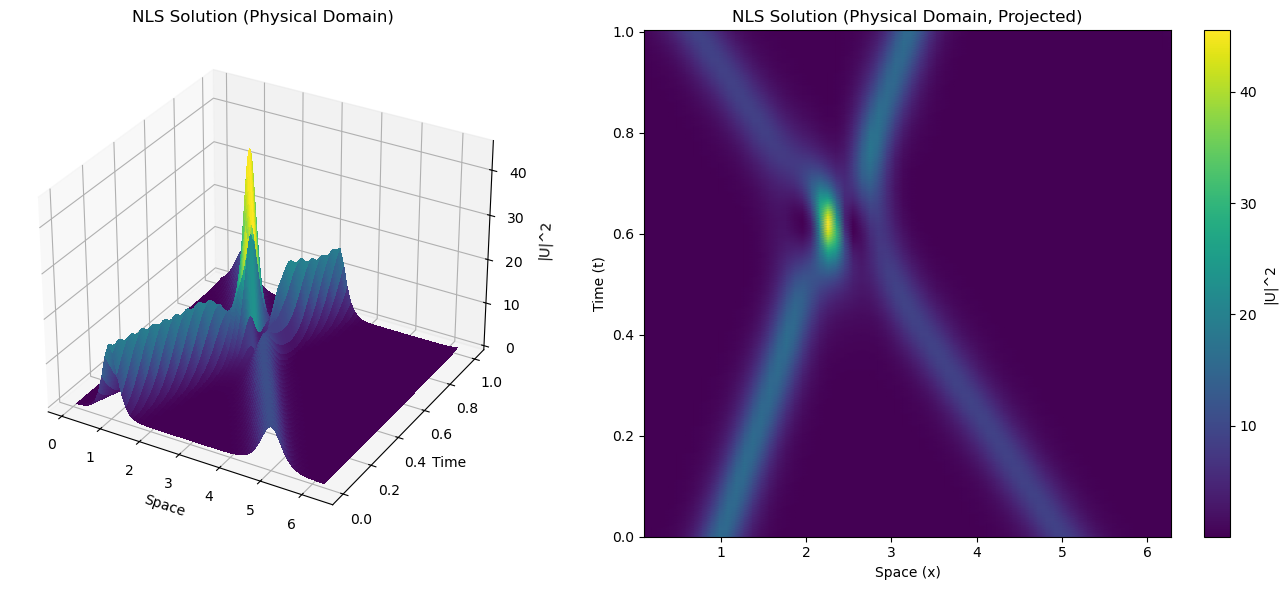

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ----------------------------------------
# Python: NLS_physical.py
# ----------------------------------------

def nls_rhs(U, k_squared):
    """
    Computes the RHS of the NLS equation in the physical domain.
    RHS = i * 0.5 * U_xx + i * U * |U|^2
    """
    # Compute second derivative U_xx using FFT
    # fft(U) -> multiply by -k^2 -> ifft
    Uxx = np.fft.ifft(-k_squared * np.fft.fft(U))

    # Nonlinear term
    RHS = 1j * 0.5 * Uxx + 1j * U * (np.abs(U)**2)
    return RHS

def solve_nls_physical():
    N = 64
    h = 2 * np.pi / N
    x = h * np.arange(1, N + 1)

    dt = 0.5 * h**2 # Time step
    T = 1           # Ending time

    # Initial condition: 4*sech(4*(x-1)) * exp(i*2*x)
    # Note: numpy doesn't have sech, use 1/cosh
    U = 4 * (1.0 / np.cosh(4 * (x - 1))) * np.exp(1j * 2 * x)

    # Initial condition
    # U = 4*sech(4*(x-1)).*exp(1i*2*x) + 3*sech(3*(x-5)).*exp(-1i*4*x)
    term1 = 4 * (1.0 / np.cosh(4 * (x - 1))) * np.exp(1j * 2 * x)
    term2 = 3 * (1.0 / np.cosh(3 * (x - 5))) * np.exp(-1j * 4 * x)
    U = term1 + term2

    # Pre-compute wave numbers squared for the derivative
    # k = [0, 1, ..., N/2-1, -N/2, ..., -1]
    k = np.fft.fftshift(np.arange(-N/2, N/2))
    k_squared = k**2

    Nt = int(np.ceil(T / dt))
    Umesh = np.zeros((Nt + 1, N))
    Umesh[0, :] = np.abs(U)**2

    # Time evolution (RK4)
    for it in range(Nt):

        rk1 = nls_rhs(U, k_squared)
        rk2 = nls_rhs(U + 0.5 * dt * rk1, k_squared)
        rk3 = nls_rhs(U + 0.5 * dt * rk2, k_squared)
        rk4 = nls_rhs(U + dt * rk3, k_squared)

        U = U + (dt / 6.0) * (rk1 + 2.0 * rk2 + 2.0 * rk3 + rk4)

        Umesh[it + 1, :] = np.abs(U)**2

    # Plotting
    t_axis = np.arange(Nt + 1) * dt
    X, T_grid = np.meshgrid(x, t_axis)
    fig = plt.figure(figsize=(14, 6))

    # --- Left: 3D surface ---
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    surf = ax1.plot_surface(X, T_grid, Umesh, cmap='viridis', rstride=1, cstride=1,
                        linewidth=0, antialiased=False)
    ax1.set_xlabel('Space')
    ax1.set_ylabel('Time')
    ax1.set_zlabel('|U|^2')
    ax1.set_title('NLS Solution (Physical Domain)')

    # --- Right: 2D projected surface ---
    ax2 = fig.add_subplot(1, 2, 2)
    pcm = ax2.pcolormesh(X, T_grid, Umesh, shading='gouraud', cmap='viridis')
    ax2.set_xlabel('Space (x)')
    ax2.set_ylabel('Time (t)')
    ax2.set_title('NLS Solution (Physical Domain, Projected)')

    # Add colorbar for the 2D plot
    fig.colorbar(pcm, ax=ax2, label='|U|^2')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    solve_nls_physical()

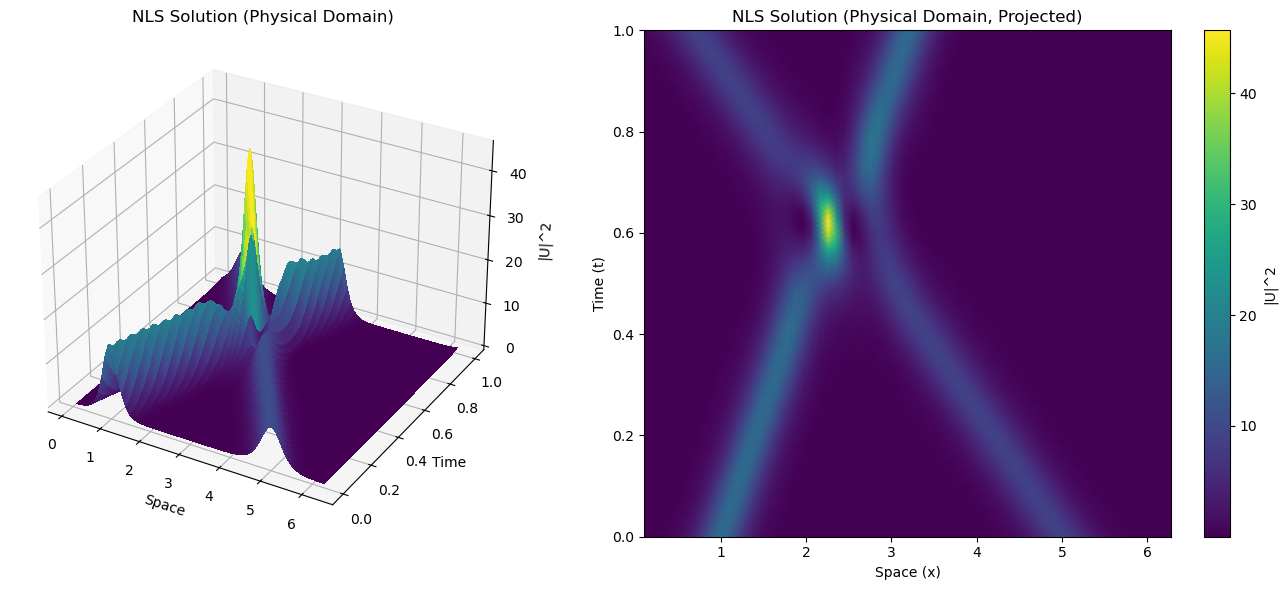

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ----------------------------------------
# Python: NLS_transform.py
# ----------------------------------------

def nls_transform_rhs(t, a, k_squared):
    """
    Computes the RHS for the transformed NLS equation.
    a: Fourier coefficients of U
    """
    # Transform back to physical space to compute nonlinear term
    # The term exp(-i * 0.5 * k^2 * t) is the integrating factor
    integrating_factor = np.exp(-1j * 0.5 * k_squared * t)

    U = np.fft.ifft(integrating_factor * a)
    V = U * U * np.conj(U) # Nonlinear term |U|^2 * U
    B = np.fft.fft(V)

    # Compute RHS in transform space
    # Inverse integrating factor applied to the nonlinear result
    RHS = 1j * np.exp(1j * 0.5 * k_squared * t) * B
    return RHS

def solve_nls_transform():
    N = 64
    h = 2 * np.pi / N
    x = h * np.arange(1, N + 1)

    dt = 0.01
    T = 1

    # Initial condition
    # U = 4*sech(4*(x-1)).*exp(1i*2*x) + 3*sech(3*(x-5)).*exp(-1i*4*x)
    term1 = 4 * (1.0 / np.cosh(4 * (x - 1))) * np.exp(1j * 2 * x)
    term2 = 3 * (1.0 / np.cosh(3 * (x - 5))) * np.exp(-1j * 4 * x)
    U = term1 + term2

    # Compute wave numbers
    k = np.fft.fftshift(np.arange(-N/2, N/2))
    k_squared = k**2

    # Compute FFT of initial condition
    a = np.fft.fft(U)

    Nt = int(np.ceil(T / dt))
    Umesh = np.zeros((Nt + 1, N))
    Umesh[0, :] = np.abs(U)**2

    # Time evolution (RK4 in spectral domain)
    for it in range(Nt):
        t = it * dt

        rk1 = nls_transform_rhs(t, a, k_squared)
        rk2 = nls_transform_rhs(t + 0.5 * dt, a + 0.5 * dt * rk1, k_squared)
        rk3 = nls_transform_rhs(t + 0.5 * dt, a + 0.5 * dt * rk2, k_squared)
        rk4 = nls_transform_rhs(t + dt, a + dt * rk3, k_squared)

        a = a + (dt / 6.0) * (rk1 + 2 * rk2 + 2 * rk3 + rk4)

        # Recover physical solution for storage/plotting
        # We must apply the integrating factor at time t + dt
        U_physical = np.fft.ifft(np.exp(-1j * 0.5 * k_squared * (t + dt)) * a)

        Umesh[it + 1, :] = np.abs(U_physical)**2

     # Plotting
    t_axis = np.arange(Nt + 1) * dt
    X, T_grid = np.meshgrid(x, t_axis)
    fig = plt.figure(figsize=(14, 6))

    # --- Left: 3D surface ---
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    surf = ax1.plot_surface(X, T_grid, Umesh, cmap='viridis', rstride=1, cstride=1,
                        linewidth=0, antialiased=False)
    ax1.set_xlabel('Space')
    ax1.set_ylabel('Time')
    ax1.set_zlabel('|U|^2')
    ax1.set_title('NLS Solution (Physical Domain)')

    # --- Right: 2D projected surface ---
    ax2 = fig.add_subplot(1, 2, 2)
    pcm = ax2.pcolormesh(X, T_grid, Umesh, shading='gouraud', cmap='viridis')
    ax2.set_xlabel('Space (x)')
    ax2.set_ylabel('Time (t)')
    ax2.set_title('NLS Solution (Physical Domain, Projected)')

    # Add colorbar for the 2D plot
    fig.colorbar(pcm, ax=ax2, label='|U|^2')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    solve_nls_transform()

# Exercises

**Exercise 1**

Recall that our finite difference approximation for derivatives can be thought of as fitting a polynomial to the data and computing the derivative of that polynomial approximation: e.g. for the centered, second-order finite difference approximation, we fit the data to a parabola and compute the second derivative of that parabola. Suppose now, we include all of the data and fit the highest degree polynomial that we can to the data.

First, we construct the vector $\textbf{U}$ whose entries are given by the values of $u(x)$ evaluated at $x_i$ for $i = 0, 1, \dots , m+1$. For each $x_i$, we compute the $m+1$ degree polynomial interpolant $P_{m+1}(x)$ through the $m+2$ data given by the entries of $\textbf{U}$. Then, we compute the exact second derivative of that polynomial evaluated at $x_i$, denoted by $P_{m+1}''(x_i)$,
$$P_{m+1}''(x_i ) = \sum_{j=0}^{m+1}c_j u(x_j).$$
This is quite easy to do in Python! You can use `scipy.interpolate.BarycentricInterpolator` or implement the Fornberg algorithm (often available as `weights` in finite difference packages) to find the weights.

Using $N$ points generally gives $O(h^{N-2})$ accuracy for the second derivative (or one order higher if the approximation is symmetric). Using that logic, we are interpolating $m + 2$ points where $m = O(1/h)$, so we should expect that we obtain $O(h^m) = O(h^{1/h})$ accuracy. Because $O(h^{1/h})$ decays faster than any fixed power of $h$, we say that this convergence rate is *spectral* or *hyper-algebraic*.

(a) Construct a numerical experiment to compute this *spectral convergence*.

(b) What to do you observe as $m$ increases? Do you encounter numerical issues in Python? Perhaps you remember from your undergraduate numerical analysis course that when you try to interpolate high order polynomials on uniform grids that we run into what is called the Runge phenomenon. In fact, the polynomial becomes highly oscillatory and becomes exponentially worse as the degree of the polynomial approximation increases. The Runge phenomenon is corrupting our beautiful numerical approach! We can remedy this situation by considering a non-uniform grid: the Chebyshev grid points. We will come back to this in the next lecture.

m= 4, h=4.000e-01, max error=6.773e+00
m= 8, h=2.222e-01, max error=7.927e-02
m=12, h=1.538e-01, max error=1.394e-04
m=16, h=1.176e-01, max error=7.055e-08
m=20, h=9.524e-02, max error=7.451e-09
m=24, h=8.000e-02, max error=1.490e-07
m=28, h=6.897e-02, max error=3.815e-06
m=32, h=6.061e-02, max error=5.341e-05
m=36, h=5.405e-02, max error=1.160e-03
m=40, h=4.878e-02, max error=2.832e-02


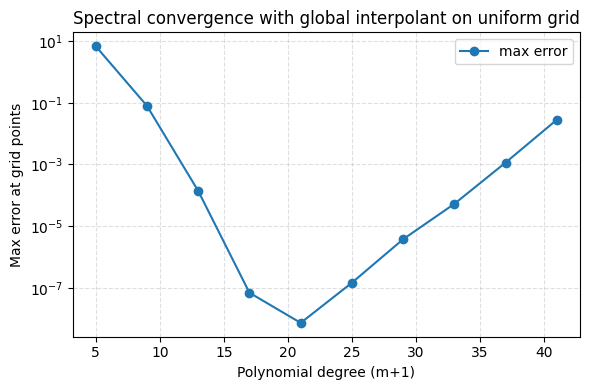

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator

def spectral_convergence_second_derivative(ms):
    errors = []
    hs = []
    for m in ms:
        x = np.linspace(-1.0, 1.0, m + 2)
        h = x[1] - x[0]
        u = np.sin(np.pi * x)
        u_xx_true = -(np.pi**2) * np.sin(np.pi * x)
        interp = BarycentricInterpolator(x, u)
        u_xx_num = interp.derivative(x, der=2)
        errors.append(np.linalg.norm(u_xx_num - u_xx_true, ord=np.inf))
        hs.append(h)
    return np.array(hs), np.array(errors)

m_values = np.arange(4, 52, 4)
h, err = spectral_convergence_second_derivative(m_values)

for m, step, e in zip(m_values, h, err):
    print(f"m={m:2d}, h={step:.3e}, max error={e:.3e}")

plt.figure(figsize=(6, 4))
plt.semilogy(m_values + 1, err, 'o-', label='max error')
plt.xlabel('Polynomial degree (m+1)')
plt.ylabel('Max error at grid points')
plt.title('Spectral convergence with global interpolant (barycentric)')
plt.grid(True, which='both', ls='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


---

**Exercise 2**

We discuss in the text that interpolation and differentiation do not commute and so, $(I_N u)' \neq I_N u'$ unless $u = I_N u$. Write a Python script to illustrate this fact.

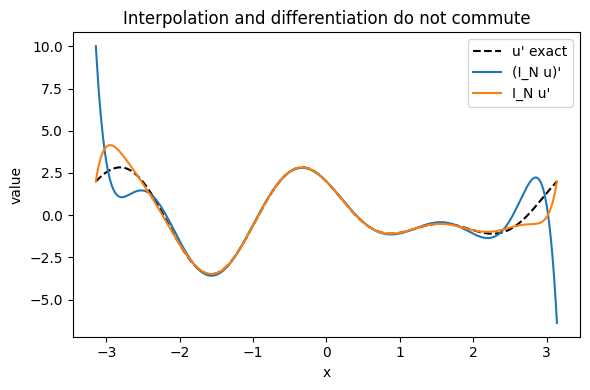

Max difference between (I_N u)' and I_N u': 8.381e+00
Max error vs exact derivative for (I_N u)': 8.381e+00
Max error vs exact derivative for I_N u': 1.519e+00


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def interpolate_polynomial(x_nodes, values):
    return np.polynomial.polynomial.polyfit(x_nodes, values, len(x_nodes) - 1)

def eval_polynomial(coeffs, x):
    return np.polynomial.polynomial.polyval(x, coeffs)

def poly_derivative(coeffs):
    if len(coeffs) <= 1:
        return np.array([0.0])
    return np.array([i * coeffs[i] for i in range(1, len(coeffs))])

u = lambda x: np.sin(2 * x) + 0.5 * np.cos(3 * x)
u_prime = lambda x: 2 * np.cos(2 * x) - 1.5 * np.sin(3 * x)

x_nodes = np.linspace(-np.pi, np.pi, 12)
coeffs_interp = interpolate_polynomial(x_nodes, u(x_nodes))
coeffs_interp_prime = poly_derivative(coeffs_interp)
coeffs_interpolated_derivative = interpolate_polynomial(x_nodes, u_prime(x_nodes))

x_plot = np.linspace(-np.pi, np.pi, 400)
true_prime = u_prime(x_plot)
interp_then_diff = eval_polynomial(coeffs_interp_prime, x_plot)
diff_then_interp = eval_polynomial(coeffs_interpolated_derivative, x_plot)

plt.figure(figsize=(6, 4))
plt.plot(x_plot, true_prime, 'k--', label="u' exact")
plt.plot(x_plot, interp_then_diff, label="(I_N u)'")
plt.plot(x_plot, diff_then_interp, label="I_N u'")
plt.xlabel('x')
plt.ylabel('value')
plt.title('Interpolation and differentiation do not commute')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Max difference between (I_N u)' and I_N u': {np.max(np.abs(interp_then_diff - diff_then_interp)):.3e}")
print(f"Max error vs exact derivative for (I_N u)': {np.max(np.abs(interp_then_diff - true_prime)):.3e}")
print(f"Max error vs exact derivative for I_N u': {np.max(np.abs(diff_then_interp - true_prime)):.3e}")



---

**Exercise 3**

`FourierSpectralDifferentiation.py` implements the Fourier Spectral differentiation using FFT (via `numpy.fft`). Write a script to compute the Fourier Spectral differentiation using the approach based on the differentiation matrix. Check that both yields the same accuracy, except possibly for round-off errors.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fourier_diff_matrix_first(N, L=2 * np.pi):
    '''Dense Fourier differentiation matrix for a periodic grid of length L.'''
    x = np.linspace(0.0, L, N, endpoint=False)
    k = np.fft.fftfreq(N, d=L / N) * 2 * np.pi
    K = k[:, None]
    X = x[None, :]
    F = np.exp(-1j * K * X)
    Finv = np.exp(1j * K * X) / N
    D = Finv @ (1j * K * F)
    return x, np.real_if_close(D)

def fft_derivative(u, L=2 * np.pi):
    N = len(u)
    k = np.fft.fftfreq(N, d=L / N) * 2 * np.pi
    u_hat = np.fft.fft(u)
    return np.real(np.fft.ifft(1j * k * u_hat))

N_list = [16, 32, 64, 128]
errs_matrix, errs_fft = [], []

for N in N_list:
    x, D = fourier_diff_matrix_first(N)
    u = np.sin(3 * x) + 0.5 * np.cos(5 * x)
    u_x_true = 3 * np.cos(3 * x) - 2.5 * np.sin(5 * x)

    u_x_matrix = D @ u
    u_x_fft = fft_derivative(u)

    errs_matrix.append(np.linalg.norm(u_x_matrix - u_x_true, ord=np.inf))
    errs_fft.append(np.linalg.norm(u_x_fft - u_x_true, ord=np.inf))

    print(f"N={N:3d} |D u|_inf error: {errs_matrix[-1]:.2e} |FFT du|_inf error: {errs_fft[-1]:.2e}")

plt.figure(figsize=(6, 4))
plt.loglog(N_list, errs_matrix, 'o-', label='matrix D @ u')
plt.loglog(N_list, errs_fft, 's--', label='FFT differentiation')
plt.xlabel('N (grid points)')
plt.ylabel('max error vs exact')
plt.title('Fourier spectral differentiation: matrix vs FFT')
plt.grid(True, which='both', ls='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


---

**Exercise 4**

Given the constant coefficient advection equation $u_t = u_x$ with periodic boundary conditions:

(a) Write a script to solve this PDE problem using the spectral differentiation matrix.

(b) Compute its eigenvalues (using `numpy.linalg.eig`) and check the stability restriction derived in Section 4.

(c) Solve the problem using the FFT and check whether the stability restrictions above apply here as well.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigvals


def fourier_diff_matrix_first(N, L=2 * np.pi):
    x = np.linspace(0.0, L, N, endpoint=False)
    k = np.fft.fftfreq(N, d=L / N) * 2 * np.pi
    K = k[:, None]
    X = x[None, :]
    F = np.exp(-1j * K * X)
    Finv = np.exp(1j * K * X) / N
    D = Finv @ (1j * K * F)
    return x, np.real_if_close(D)

def rk4(u, dt, rhs):
    k1 = rhs(u)
    k2 = rhs(u + 0.5 * dt * k1)
    k3 = rhs(u + 0.5 * dt * k2)
    k4 = rhs(u + dt * k3)
    return u + (dt / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)

N = 64
L = 2 * np.pi
x, D = fourier_diff_matrix_first(N, L)
lam = eigvals(D)
max_lam = np.max(np.abs(lam))
stable_dt = 2.8 / max_lam  # RK4 stability radius along imaginary axis

print(f"Max |lambda(D)| = {max_lam:.2e}")
print(f"RK4 dt stability estimate ~ {stable_dt:.3e}")

T = 1.0
dt = 0.4 * stable_dt
u0 = np.sin(x) + 0.25 * np.sin(2 * x)

u_mat = np.copy(u0)
nt = int(np.ceil(T / dt))

rhs_mat = lambda u: D @ u
for _ in range(nt):
    u_mat = rk4(u_mat, dt, rhs_mat)

u_exact = np.sin((x - T) % L) + 0.25 * np.sin(2 * (x - T) % L)
err_mat = np.linalg.norm(u_mat - u_exact, ord=np.inf)
print(f"Matrix method error at T={T}: {err_mat:.2e}")

k = np.fft.fftfreq(N, d=L / N) * 2 * np.pi
rhs_fft = lambda u: np.real(np.fft.ifft(1j * k * np.fft.fft(u)))
u_fft = np.copy(u0)
for _ in range(nt):
    u_fft = rk4(u_fft, dt, rhs_fft)
err_fft = np.linalg.norm(u_fft - u_exact, ord=np.inf)
print(f"FFT method error at T={T}: {err_fft:.2e}")

plt.figure(figsize=(7, 4))
plt.plot(x, u_exact, 'k--', label='exact shift')
plt.plot(x, u_mat, label='matrix spectral')
plt.plot(x, u_fft, ':', label='FFT spectral')
plt.xlabel('x')
plt.ylabel('u(x,T)')
plt.title(f'Advection u_t = u_x, dt={dt:.2e}, nt={nt}')
plt.legend()
plt.tight_layout()
plt.show()


---

**Exercise 5**

Solve using the Fourier spectral method the diffusion equation with decay
$$
u_t = \alpha u_{xx} - \beta u,\qquad  x \in (0,1),\quad t \in(0, T],%\\
%u(0, t) = u(1, t) = 0,\quad t \in (0, T].\qquad
$$
with coefficients $\alpha=1$ and $\beta=0.5$, initial condition $u(x,0) = \sin(2\pi x)$ and periodic boundary conditions.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alpha, beta = 1.0, 0.5
N = 64
L = 1.0
x = np.linspace(0.0, L, N, endpoint=False)
dx = L / N
k = 2 * np.pi * np.fft.fftfreq(N, d=dx)

u0 = np.sin(2 * np.pi * x)

dt = 1e-3
T = 0.2
nt = int(np.ceil(T / dt))

u_hat = np.fft.fft(u0)
decay = np.exp((-(alpha * k**2) - beta) * dt)

u_sol = np.zeros((nt + 1, N))
u_sol[0] = u0

for n in range(nt):
    u_hat *= decay
    u_sol[n + 1] = np.real(np.fft.ifft(u_hat))

t_axis = np.arange(nt + 1) * dt

exact = np.sin(2 * np.pi * x) * np.exp((-(alpha * (2 * np.pi)**2) - beta) * t_axis[-1])
err = np.linalg.norm(u_sol[-1] - exact, ord=np.inf)
print(f"Max error at T={T}: {err:.2e}")

plt.figure(figsize=(7, 4))
plt.plot(x, u_sol[0], label='u(x,0)')
plt.plot(x, u_sol[-1], label=f'u(x,{T}) spectral')
plt.plot(x, exact, 'k--', label='exact mode decay')
plt.xlabel('x')
plt.ylabel('u')
plt.title('Diffusion with decay: Fourier spectral solution')
plt.legend()
plt.tight_layout()
plt.show()


---

**Exercise 6**

The script `driver_NLS_transform.py` solves the nonlinear Schrödinger equation pseudo-spectrally in the transform space.

(a) Write a script to solve the same problem but in the physical space.

(b) Investigate whether one of the approaches is more suitable than the other for this particular problem.

---


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Physical-space pseudo-spectral (nonlinearity in x, derivative via FFT)
def nls_physical(u0, dt, nt, k):
    def rhs(u):
        uxx = np.fft.ifft(-(k**2) * np.fft.fft(u))
        return 1j * 0.5 * uxx + 1j * u * (np.abs(u)**2)

    u = np.copy(u0)
    for _ in range(nt):
        k1 = rhs(u)
        k2 = rhs(u + 0.5 * dt * k1)
        k3 = rhs(u + 0.5 * dt * k2)
        k4 = rhs(u + dt * k3)
        u = u + (dt / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return u

# Transform-space (integrating factor) solver
def nls_transform(u0, dt, nt, k2):
    a = np.fft.fft(u0)
    def rhs(t, a):
        u = np.fft.ifft(np.exp(-0.5j * k2 * t) * a)
        nonlin = np.fft.fft(u * np.abs(u)**2)
        return 1j * np.exp(0.5j * k2 * t) * nonlin

    for n in range(nt):
        t = n * dt
        k1 = rhs(t, a)
        k2r = rhs(t + 0.5 * dt, a + 0.5 * dt * k1)
        k3 = rhs(t + 0.5 * dt, a + 0.5 * dt * k2r)
        k4 = rhs(t + dt, a + dt * k3)
        a = a + (dt / 6.0) * (k1 + 2 * k2r + 2 * k3 + k4)
    return np.fft.ifft(np.exp(-0.5j * k2 * nt * dt) * a)

N = 64
L = 2 * np.pi
x = np.linspace(0, L, N, endpoint=False)
dx = L / N
k = 2 * np.pi * np.fft.fftfreq(N, d=dx)
k2 = k**2

u0 = 4 / np.cosh(4 * (x - 1)) * np.exp(1j * 2 * x)

T = 0.5
dt = 1e-3
nt = int(np.ceil(T / dt))

u_phys = nls_physical(u0, dt, nt, k)

u_trans = nls_transform(u0, dt, nt, k2)

mass_phys = np.trapz(np.abs(u_phys)**2, x)
mass_trans = np.trapz(np.abs(u_trans)**2, x)

print(f"Mass phys={mass_phys:.6f}, mass transform={mass_trans:.6f}")
diff = np.linalg.norm(u_phys - u_trans, ord=np.inf)
print(f"Max difference physical vs transform at T={T}: {diff:.2e}")

plt.figure(figsize=(7, 4))
plt.plot(x, np.abs(u_phys)**2, label='|u|^2 physical')
plt.plot(x, np.abs(u_trans)**2, '--', label='|u|^2 transform')
plt.xlabel('x')
plt.ylabel('|u|^2')
plt.title('NLS: physical vs transform solvers')
plt.legend()
plt.tight_layout()
plt.show()
